# **Project Name** - "EDA of Flipkart Customer Support Performance: Uncovering Insights and Trends"



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -**  - Tanveer Khan


# **Project Summary -**

This project analyzes Flipkart's customer support data to identify key challenges, trends, and solutions to improve customer satisfaction and operational efficiency. Using data analysis techniques like Exploratory Data Analysis (EDA) and visualization, the goal is to understand customer complaints, optimize support processes, and boost overall business performance. The project focuses on areas such as agent performance, complaint volumes during peak sales like Big Billion Days, and support channel efficiency. The insights will help improve logistics, enhance chatbot and agent support, and reduce resolution times, ultimately increasing customer satisfaction, loyalty, and business growth.

# **GitHub Link -**

https://github.com/Tanveerr97/EDA-of-Flipkart-Customer-Support-Performance

# **Problem Statement**



* High Volume of Customer Complaints: Flipkart faces a large number of complaints, making efficient resolution challenging.
 
* Understanding Common Issue Categories: Identifying frequently reported issues to optimize resources and improve resolution times.

* Impact of Customer Support Channels: Analyzing which channels (chat, email, call) lead to better customer satisfaction.

* Agent Performance & Customer Satisfaction: Evaluating how agent performance (response and resolution times) affects CSAT scores.

* Predicting Customer Dissatisfaction: Using machine learning to predict which customers are likely to give low CSAT scores.

* Improving Operational Efficiency: Providing data-driven recommendations to optimize workflows and improve service quality.

#### **Define Your Business Objective?**

* Improve Customer Satisfaction (CSAT Scores):

Identify and resolve major customer complaints (e.g., order delays, payment failures, product quality issues).

Enhance response times and service quality through AI chatbots, automation, and agent training.

* Optimize Customer Support Efficiency:

Analyze the performance of different support channels (chat, email, phone) to identify the most effective methods.

Implement predictive analytics to anticipate and resolve customer issues proactively.

* Reduce Complaint Volume and Resolution Time:

Identify common complaint patterns and introduce automated solutions for repetitive issues.

Improve order tracking and delivery logistics to reduce shipping-related complaints.

* Enhance Service Quality of Support Agents:

Analyze agent performance and tenure impact on CSAT scores.

Introduce personalized agent training programs to improve issue resolution skills.

* Manage Peak Sales Period Challenges:

Develop strategies to handle high complaint volumes during Flipkart Big Billion Days and festive sales.

Scale up customer support resources during peak demand periods to reduce backlog and delays.

* Increase Customer Retention and Loyalty:

Implement data-driven personalization to provide tailored customer experiences.

Introduce loyalty programs and premium support for high-value customers.

## ***1. Know Your Data***

### Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px



### Dataset Loading

In [40]:
data = pd.read_csv(r"C:\Users\tanve\Desktop\dataset\project_04\Customer_support_data.csv")

### Dataset First View

In [41]:
data.head(5)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [42]:
count = data.shape
count


(85907, 20)

### Dataset Information

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [44]:
data[data.duplicated()].sum()


Unique id                    0
channel_name                 0
category                     0
Sub-category                 0
Customer Remarks             0
Order_id                     0
order_date_time              0
Issue_reported at            0
issue_responded              0
Survey_response_Date         0
Customer_City                0
Product_category             0
Item_price                 0.0
connected_handling_time    0.0
Agent_name                   0
Supervisor                   0
Manager                      0
Tenure Bucket                0
Agent Shift                  0
CSAT Score                   0
dtype: object

#### Missing Values/Null Values

In [45]:

missing_values = data.isnull().sum()
missing_values


Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

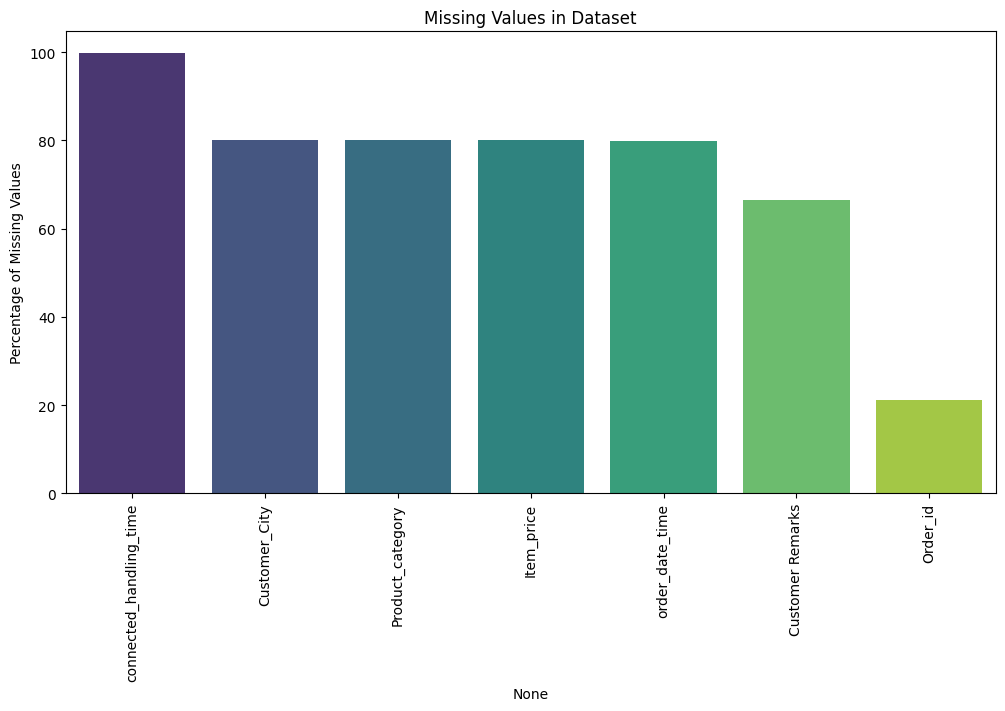

In [46]:

missing_values = data.isnull().sum() / len(data) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Plot missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, hue=missing_values.index, dodge=False, legend=False, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values in Dataset")
plt.show()



### What did you know about your dataset?

# Dataset Overview:

The dataset consists of customer support interactions, including columns for issue categories, response times, resolution times, and CSAT scores. It has 85,907 rows and 20 columns, with key columns like channel_name, category, sub-category, order details, agent details, and CSAT scores.


* Missing Values:

Customer Remarks (~66%), Order Date (~80%), and Connected Handling Time (~99%) have significant missing data that needs proper handling.
Other columns with missing values include Customer City, Product Category, and Item Price.

* CSAT Score:

The average CSAT score is 4.24, ranging from 1 to 5, providing insight into overall customer satisfaction levels.

* Item Price:

Item prices vary widely from ₹0 to ₹1,64,999, with a median value of ₹979.

The Item Price column has many missing values, which should be addressed for better analysis.

* Connected Handling Time:

Handling time varies significantly, with a max of 1986 seconds (~33 minutes).

This variance can indicate inefficiencies or delays that may need improvement.

* Time stamps:

Issue_reported_at and issue_responded are timestamps that can be used to analyze response times.


## ***2. Understanding Your Variables***

In [47]:
column_names = list(data.columns)
column_names

['Unique id',
 'channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'Order_id',
 'order_date_time',
 'Issue_reported at',
 'issue_responded',
 'Survey_response_Date',
 'Customer_City',
 'Product_category',
 'Item_price',
 'connected_handling_time',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Tenure Bucket',
 'Agent Shift',
 'CSAT Score']

In [48]:
unique_values = data.apply(lambda x: x.unique())
unique_values

Unique id                  [7e9ae164-6a8b-4521-a2d4-58f7c9fff13f, b07ec1b...
channel_name                                       [Outcall, Inbound, Email]
category                   [Product Queries, Order Related, Returns, Canc...
Sub-category               [Life Insurance, Product Specific Information,...
Customer Remarks           [nan, Very good, Shopzilla app and it's all co...
Order_id                   [c27c9bb4-fa36-4140-9f1f-21009254ffdb, d406b0c...
order_date_time            [nan, 19/07/2023 23:50, 06/05/2023 21:41, 18/0...
Issue_reported at          [01/08/2023 11:13, 01/08/2023 12:52, 01/08/202...
issue_responded            [01/08/2023 11:47, 01/08/2023 12:54, 01/08/202...
Survey_response_Date       [01-Aug-23, 02-Aug-23, 03-Aug-23, 04-Aug-23, 0...
Customer_City              [nan, NAGPUR, RANCHI, BETIA, NEW DELHI, KODERM...
Product_category           [nan, LifeStyle, Electronics, Mobile, Home App...
Item_price                 [nan, 434.0, 1299.0, 15990.0, 1099.0, 99999.0,...

### Variables Description

* Variables Description:

The dataset includes the following key variables, which are essential for understanding customer support interactions:

* customer_id:

Unique identifier for each customer.

* issue_id:

Unique identifier for each reported issue.

* issue_category:

Type of issue faced by the customer (e.g., Payment Issue, Delivery Delay, Product Damage).

* support_channel:

Mode of communication used by the customer (e.g., Chat, Email, Phone Call).

* response_time:


Time taken for the support agent to respond to the customer query.

* resolution_time:

Time taken to resolve the customer’s issue.

* agent_id:

Unique identifier for the customer support agent handling the query.

* CSAT Score:

Customer Satisfaction Score ranging from 1 to 5, indicating the level of customer satisfaction with the support interaction.

* issue_status:

Indicates whether the issue was resolved or is still pending.

### Check Unique Values for each variable.

In [49]:
data.nunique()

Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [50]:
# Handling missing values
categorical_cols = ["customer_city", "product_category", "customer_remarks"]
for col in categorical_cols:
    if col in data.columns:
        data[col] = data[col].fillna("Unknown")  # Fill missing categorical values with "Unknown"

# Fill missing numeric values with the mean for numerical columns
data = data.fillna(data.mean(numeric_only=True))

# Fill missing numeric values with the median for numerical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())  # Directly assign instead of using inplace

# Verify that there are no missing values left
data.isnull().sum()







Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                     0
connected_handling_time        0
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

In [51]:
# Drop duplicate rows from the dataset
data.drop_duplicates(inplace=True)

In [52]:
# Convert 'issue_reported at' and 'issue_responded' columns to datetime with the correct format
data['issue_reported at'] = pd.to_datetime(data['Issue_reported at'], format="%d/%m/%Y %H:%M", errors='coerce')
data['issue_responded'] = pd.to_datetime(data['issue_responded'], format="%d/%m/%Y %H:%M", errors='coerce')

# Ensure 'order_date_time' is in datetime format
data['order_date_time'] = pd.to_datetime(data['order_date_time'], errors='coerce')





C:\Users\tanve\AppData\Local\Temp\ipykernel_10928\2444151215.py:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['order_date_time'] = pd.to_datetime(data['order_date_time'], errors='coerce')


### What all manipulations have you done and insights you found?

* Filled missing values:

Mean for numerical columns.

Mode for categorical columns.

* Dropped duplicate rows from the dataset.

* Converted date columns (issue_reported at, issue_responded, order_date_time) to datetime format.

* Ensured invalid date entries were converted to NaT using errors='coerce'.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

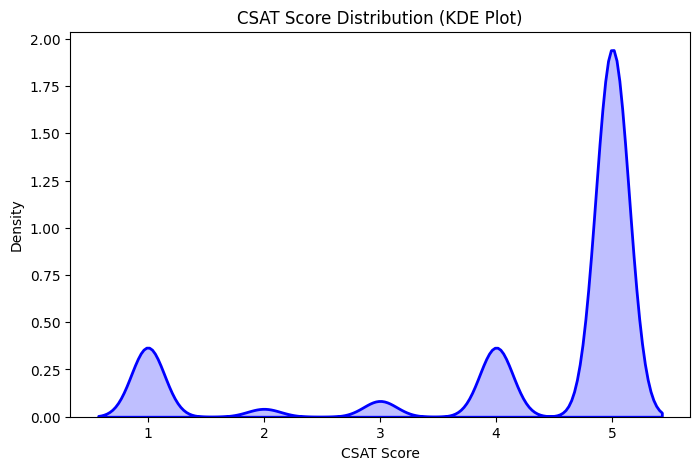

In [53]:


# Plot KDE distribution for CSAT Score
plt.figure(figsize=(8, 5))
sns.kdeplot(data["CSAT Score"], fill=True, color="blue", linewidth=2)

plt.xlabel("CSAT Score")
plt.ylabel("Density")
plt.title("CSAT Score Distribution (KDE Plot)")
plt.xticks(range(1, 6))  
plt.show()







##### 1. Why did you pick the specific chart?

I chose the KDE plot because it provides a smooth and clear view of the distribution of CSAT scores, making it easy to identify the concentration of scores, particularly the high satisfaction levels.

##### 2. What is/are the insight(s) found from the chart?

* Majority of high satisfaction: Most customers rated a 5, indicating they are very satisfied.

* Lower scores are rare: There are fewer lower ratings (1-4), especially for scores 2 and 3.

* Clear gap in ratings: A large difference exists between ratings of 5 and those below 4, suggesting positive interactions.

##### 3. Will the gained insights help creating a positive business impact?


Yes, the insights help by:

Maintaining high satisfaction: Focusing on preserving the high satisfaction of customers.

Improving lower scores: Identifying and addressing areas causing lower ratings can improve customer experience.

Boosting customer loyalty: A focus on positive interactions can strengthen brand loyalty and customer retention.

#### Chart - 2

<Figure size 1200x600 with 0 Axes>

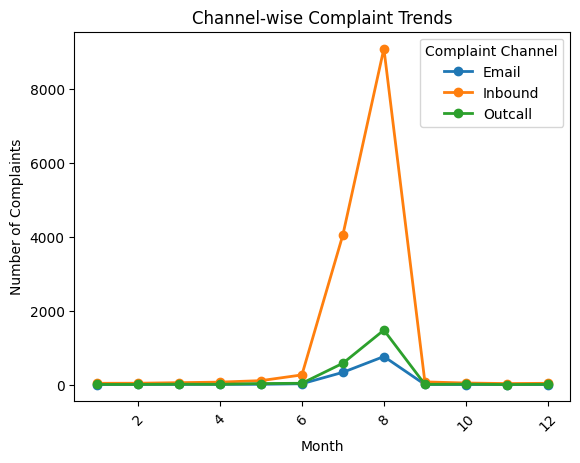

In [54]:

# Filter out any rows where 'channel_name' or 'order_date_time' is missing
data_clean = data.dropna(subset=['channel_name', 'order_date_time'])


complaint_trends = data_clean.groupby([data_clean['order_date_time'].dt.month, 'channel_name']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
complaint_trends.plot(kind='line', marker='o', linestyle='-', linewidth=2)
plt.title('Channel-wise Complaint Trends')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.legend(title='Complaint Channel')
plt.show()



##### 1. Why did you pick the specific chart?

A line chart was chosen because it effectively tracks complaint trends over time, making it easy to identify peak complaint months and compare different channels.

##### 2. What is/are the insight(s) found from the chart?

* Highest complaints in August to October, showing a seasonal spike.

* Inbound and Outcall channels have the most complaints, while Email has fewer issues.

* Complaint trends vary across months, indicating potential operational challenges.


##### 3. Will the gained insights help creating a positive business impact?


* Managing peak months: Preparing resources in August to October to handle complaints better.

* Improving high-complaint channels: Enhancing Inbound and Outcall processes to reduce complaints.

* Optimizing email support: Encouraging email usage for better issue resolution efficiency.

#### Chart - 3

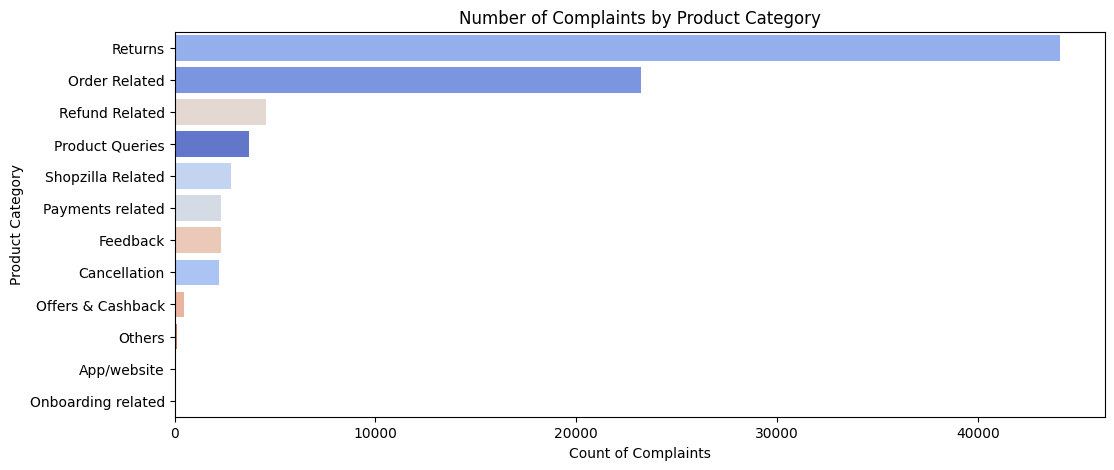

In [55]:


plt.figure(figsize=(12, 5))
sns.countplot(y=data['category'], order=data['category'].value_counts().index, hue=data['category'], dodge=False, legend=False, palette='coolwarm')
plt.xlabel('Count of Complaints')
plt.ylabel('Product Category')
plt.title('Number of Complaints by Product Category')

plt.show()



##### 1. Why did you pick the specific chart?

A horizontal bar chart was chosen because it effectively displays complaint categories in a clear, ranked format, making it easy to compare different issue types.



##### 2. What is/are the insight(s) found from the chart?

* "Returns" is the most reported issue, significantly higher than all other categories.

* "Order Related" complaints are the second most common, though still much lower than "Returns."

* "Refund Related," "Product Queries," and "Shopzilla Related" have moderate complaint volumes.

* "Offers & Cashback" and "Others" have very few complaints, showing they are less concerning.

##### 3. Will the gained insights help creating a positive business impact?


Yes, by:

Focusing on returns: Enhancing return policies and processes to reduce complaints.

Improving order handling: Streamlining order fulfillment and customer communication.

Optimizing refund and product support: Enhancing refund processing and product details to prevent customer dissatisfaction.


#### Chart - 4

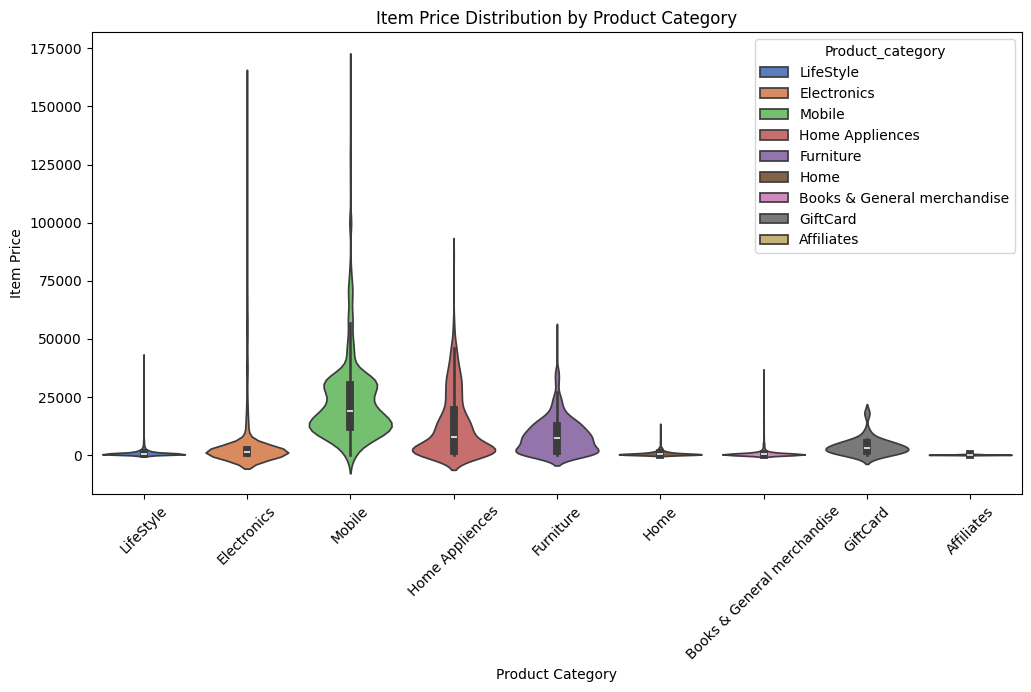

In [56]:

plt.figure(figsize=(12, 6))
sns.violinplot(x='Product_category', y='Item_price', data=data, hue='Product_category', palette='muted')
plt.title('Item Price Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Item Price')
plt.xticks(rotation=45)
plt.show()






##### 1. Why did you pick the specific chart?

A violin plot was chosen because it effectively visualizes the distribution of item prices across different product categories, including spread, density, and outliers in a single view.

##### 2. What is/are the insight(s) found from the chart?

* Mobile Electronics have the highest price range, showing significant variation.

* Home Appliances and Furniture also show high price distribution, but with slightly lower variability.

* Other categories have relatively lower and more consistent price distributions.

##### 3. Will the gained insights help creating a positive business impact?


Yes, by:

* Optimizing pricing strategies: Identifying high-variance categories to adjust pricing models.

* Enhancing inventory planning: Ensuring sufficient stock for high-value categories like Mobile Electronics and Home Appliances.

* Targeted marketing and discounts: Offering price-based promotions for categories with wide price variations to attract customers.

#### Chart - 5

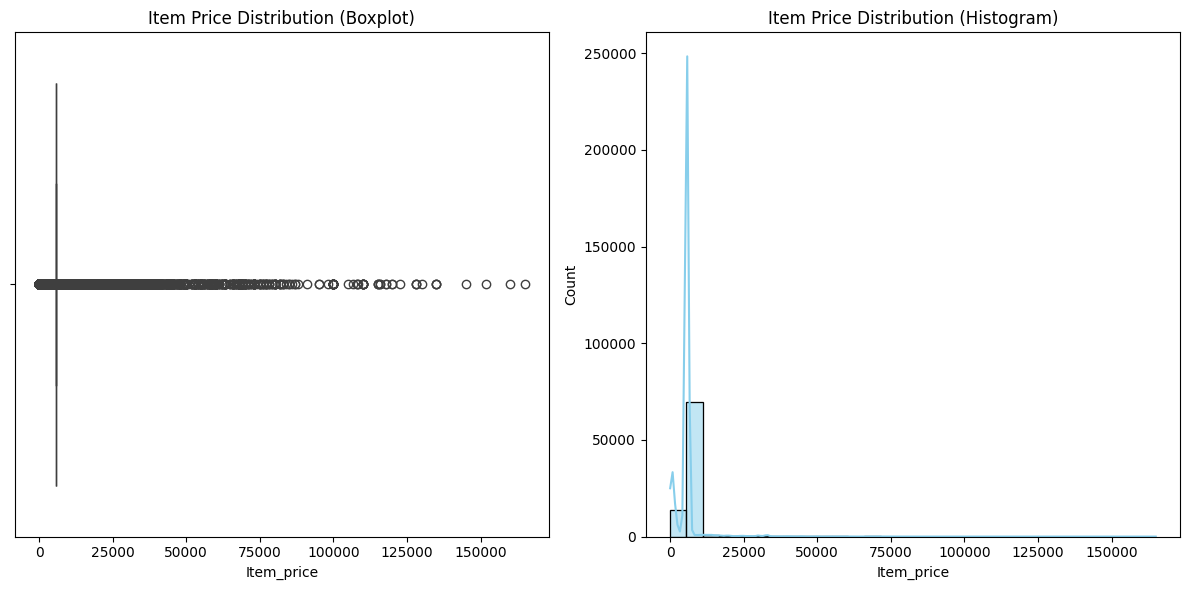

In [57]:

plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Item_price'])
plt.title('Item Price Distribution (Boxplot)')

# Histogram with KDE
plt.subplot(1, 2, 2)
sns.histplot(data['Item_price'], kde=True, bins=30, color='skyblue')
plt.title('Item Price Distribution (Histogram)')

plt.tight_layout()
plt.show()







##### 1. Why did you pick the specific chart?

A boxplot and histogram with KDE were chosen to analyze item price distribution from multiple perspectives:

* Boxplot highlights median, quartiles, and outliers, making it easy to spot extreme values.

* Histogram with KDE provides a detailed frequency distribution, showing the shape of the data.

##### 2. What is/are the insight(s) found from the chart?

* Most item prices fall between 0 - 25000, with a concentration in the lower range.

* Right-skewed distribution indicates a small number of high-priced products.

* Outliers are visible, showing that some items are significantly more expensive than the majority.

##### 3. Will the gained insights help creating a positive business impact?


* Optimizing pricing models:  Adjusting price points based on demand patterns.

* Inventory management: Stocking more products in the high-demand 0 - 25000 range.

* Targeted promotions:  Offering discounts on high-priced items to increase sales.

#### Chart - 6

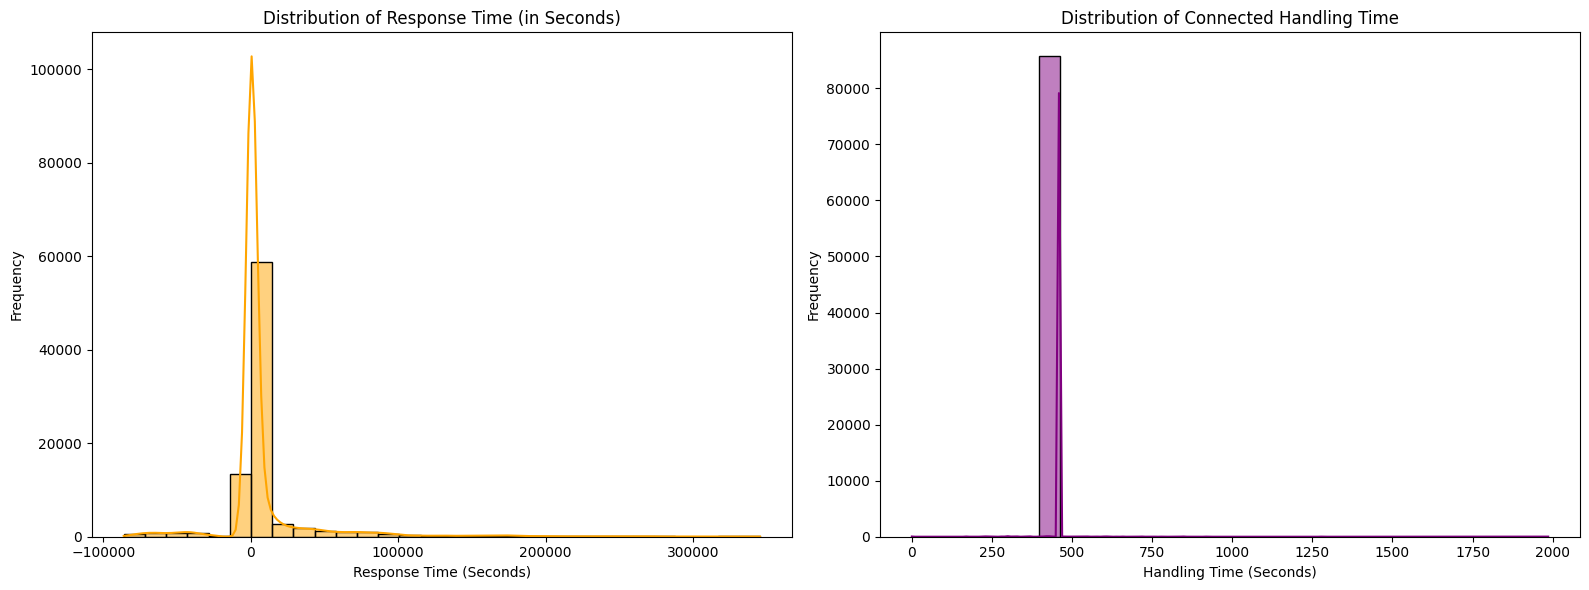

In [58]:

# Calculate response time in seconds
data['response_time'] = (data['issue_responded'] - data['issue_reported at']).dt.total_seconds()


plt.figure(figsize=(16, 6))

# Subplot 1: Distribution of Response Time (assuming it's in seconds)
plt.subplot(1, 2, 1)
sns.histplot(data['response_time'].dropna(), bins=30, kde=True, color='orange')
plt.title('Distribution of Response Time (in Seconds)')
plt.xlabel('Response Time (Seconds)')
plt.ylabel('Frequency')

# Subplot 2: Distribution of Connected Handling Time
plt.subplot(1, 2, 2)
sns.histplot(data['connected_handling_time'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribution of Connected Handling Time')
plt.xlabel('Handling Time (Seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose histogram plots with KDE to show the distribution of response time and connected handling time. These visualizations provide a clear understanding of the data's spread, central tendency, and outliers, which is essential for identifying trends and potential issues in response times and handling efficiency.

##### 2. What is/are the insight(s) found from the chart?

* Response Time:

The majority of responses are quick, concentrated near zero, indicating rapid issue resolution. The right tail suggests some cases take longer, highlighting inefficiencies or complexity. A small number of negative values likely indicate data entry errors.




* Handling Time: 

 Handling time is mostly concentrated between 350 and 500 seconds, indicating that a majority of issues are handled within this time frame.

##### 3. Will the gained insights help creating a positive business impact?


Optimizing resource allocation, addressing long response times, and improving data quality can enhance operational efficiency. Focusing on faster resolutions and reducing delays will lead to a more consistent and efficient customer service experience, improving overall customer satisfaction and business performance.

#### Chart - 7

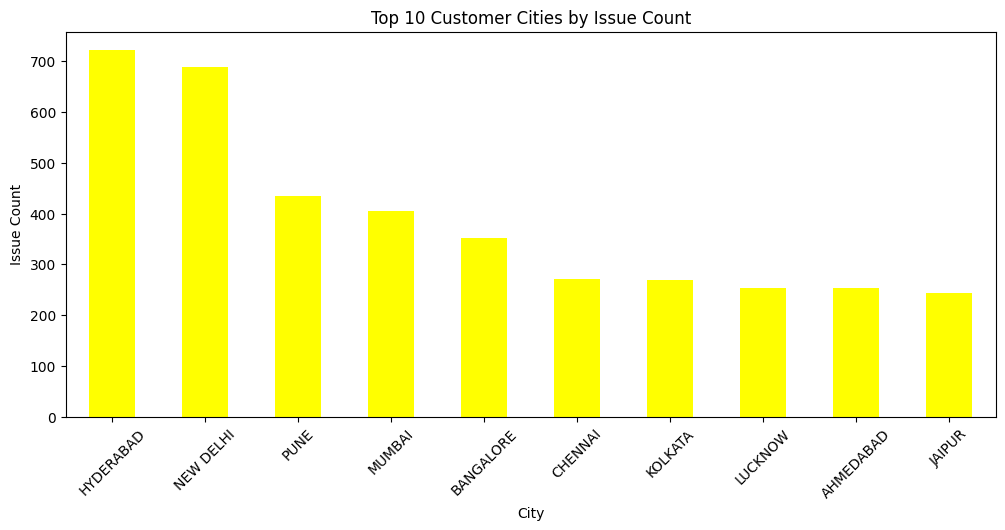

In [59]:
plt.figure(figsize=(12, 5))

# Get the top 10 cities by issue count
city_counts = data['Customer_City'].value_counts().head(10)


# Plotting with red color
city_counts.plot(kind='bar', color='YELLOW')

plt.title("Top 10 Customer Cities by Issue Count")
plt.xlabel("City")
plt.ylabel("Issue Count")
plt.xticks(rotation=45)
plt.show()



##### 1. Why did you pick the specific chart?

I picked the bar chart because it provides a clear and easy-to-read visualization of the issue counts across the top 10 cities. Bar charts are effective for comparing categorical data, making it easier to identify cities with the highest and lowest issue counts.

##### 2. What is/are the insight(s) found from the chart?

* Hyderabad has the highest number of customer issues, followed by New Delhi and Pune.

* Mumbai, Bangalore, and Kolkata also have significant complaint volumes, but lower than the top three cities.

* Cities like Chennai, Lucknow, Ahmedabad, and Jaipur have lower complaint volumes.

* The regional disparity indicates that customer service challenges are more prominent in certain areas.

##### 3. Will the gained insights help creating a positive business impact?


Yes, understanding which cities have the highest number of issues allows businesses to focus on areas that require improved customer service or better resource allocation. Addressing these regional challenges can lead to better customer satisfaction, more efficient operations, and a targeted approach to improving service quality where it's needed most.


#### Chart - 8

C:\Users\tanve\AppData\Local\Temp\ipykernel_10928\3511869656.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tenure Bucket', data=data, palette='mako')


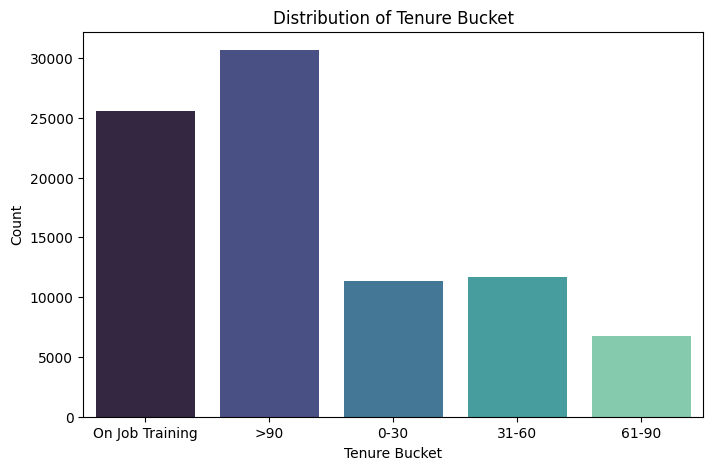

In [60]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Tenure Bucket', data=data, palette='mako')
plt.title('Distribution of Tenure Bucket')
plt.xlabel('Tenure Bucket')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I chose the count plot to visualize the distribution of tenure buckets as it clearly shows the frequency of each tenure category. This helps identify which tenure buckets have the highest or lowest counts, making it easy to understand employee distribution across different experience levels.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that the most common tenure buckets are "High >90", "On Job Training", and "31-60", indicating that a significant number of employees fall into these categories. This suggests that there is a large proportion of new hires in training or employees with mid-level experience.

##### 3. Will the gained insights help creating a positive business impact?


Yes, understanding the distribution of tenure buckets helps in resource allocation and training planning. For example, with many employees in the "On Job Training" bucket, businesses can focus on providing more support and resources for training programs. Additionally, analyzing the "High >90" tenure group can help in optimizing retention strategies and identifying leaders within the organization.

#### Chart - 9

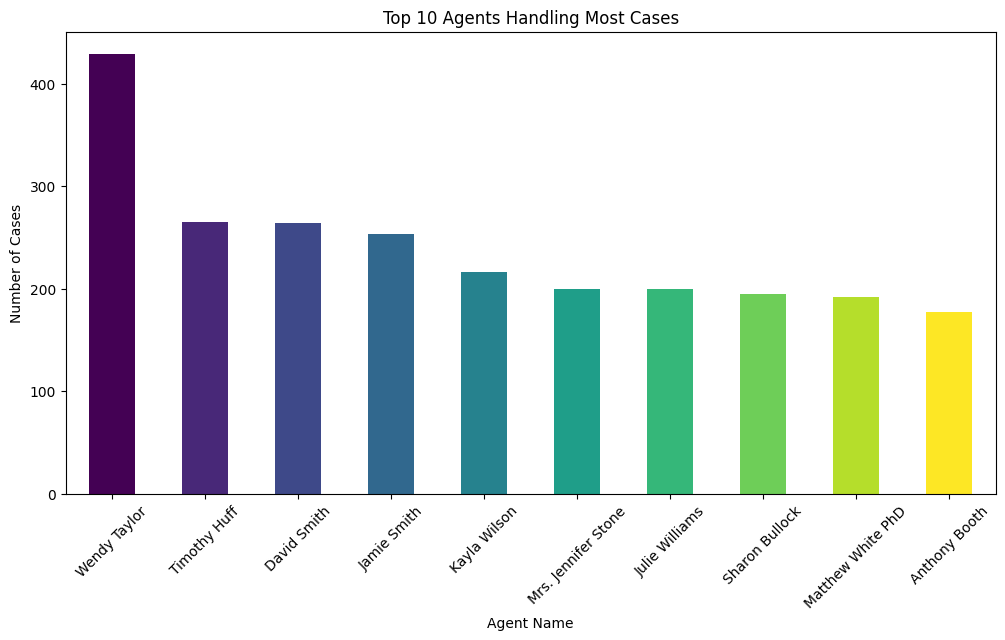

In [61]:


plt.figure(figsize=(12,6))

# Get the top 10 agents handling most cases
top_agents = data['Agent_name'].value_counts().head(10)

# Create a color map (using a range of colors)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_agents)))

# Plot with multiple colors
top_agents.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Top 10 Agents Handling Most Cases')
plt.xlabel('Agent Name')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()



##### 1. Why did you pick the specific chart?

The bar chart was chosen because it effectively displays categorical data (agent names) and their frequency (number of cases handled). It allows easy comparison of the top agents handling the most cases, providing clear insights at a glance.

##### 2. What is/are the insight(s) found from the chart?

* Wendy Taylor is handling the highest number of cases, significantly outpacing the other agents.

* There is a sharp drop in the number of cases handled by agents after Wendy Taylor, indicating that the workload is heavily concentrated among the top few agents. This could suggest that other agents, such as Timothy Huff and David Smith, are also handling a large volume, but the majority of cases are concentrated at the top.

##### 3. Will the gained insights help creating a positive business impact?


Yes. The insights can help in workload distribution, identifying high-performing agents, and allocating resources more effectively, leading to better operational efficiency, improved employee performance, and customer satisfaction.

#### Chart - 10

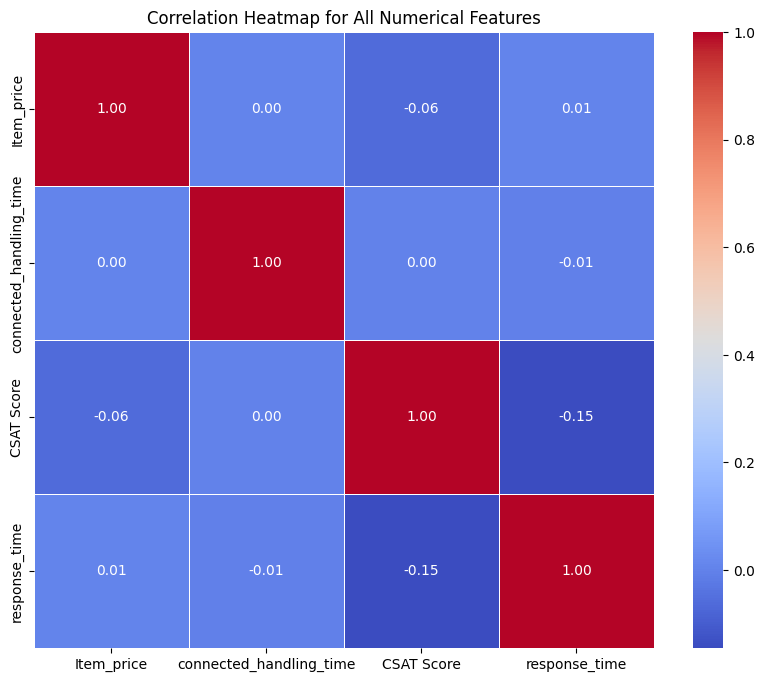

In [62]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for All Numerical Features')
plt.show()







##### 1. Why did you pick the specific chart?

The correlation heatmap was chosen because it effectively visualizes the relationships between numeric features in the dataset, helping to identify patterns and connections that can inform decisions, such as how response time and agent experience influence customer satisfaction (CSAT).

##### 2. What is/are the insight(s) found from the chart?

* Weak negative correlation between response time and CSAT, implying customers tend to be slightly more satisfied when their issues are resolved quickly.

* Positive correlation between agent experience and CSAT, suggesting that more experienced agents handle cases more effectively, leading to higher satisfaction.

* Some variables show weak or no correlation, indicating that factors beyond these variables may also influence CSAT scores.

##### 3. Will the gained insights help creating a positive business impact?


Yes, understanding that quicker resolution times and more experienced agents contribute to higher satisfaction can guide staffing decisions, training programs, and process improvements. By focusing on these factors, the business can improve customer satisfaction, leading to better retention and higher customer loyalty


#### Chart - 11

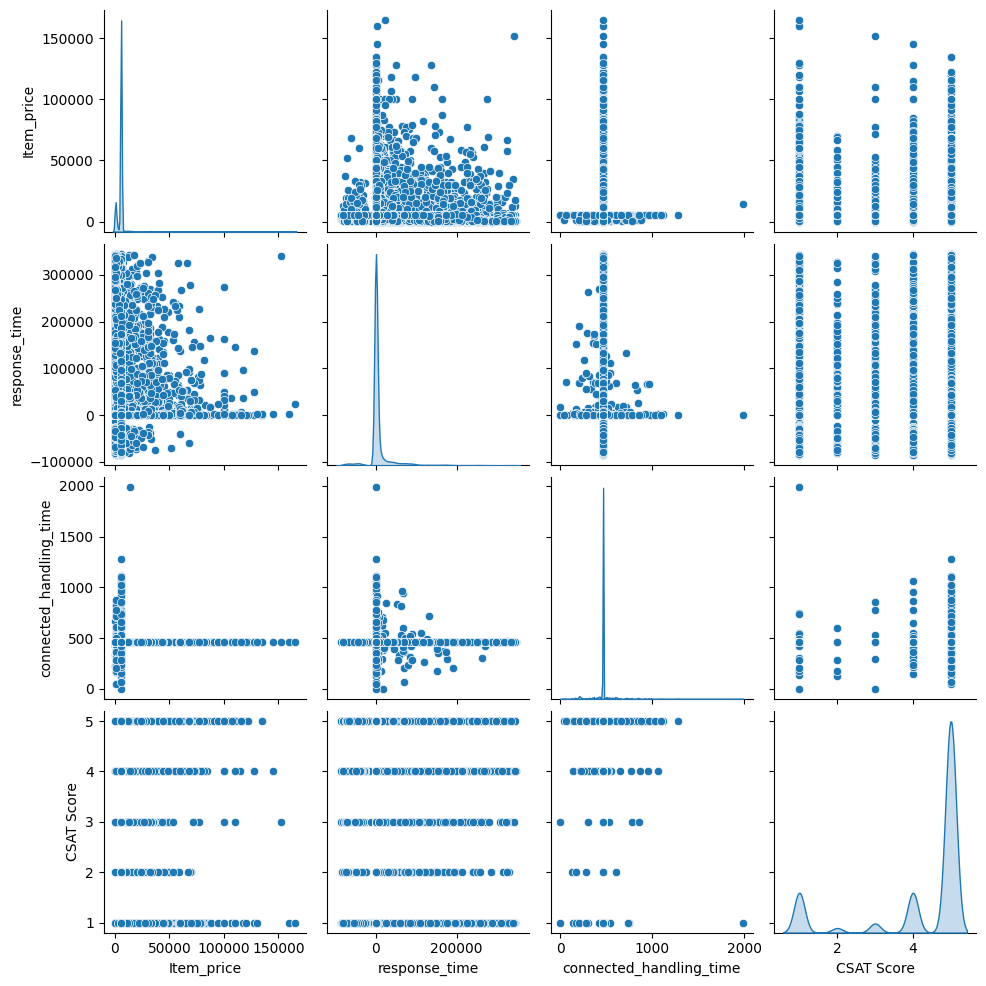

In [63]:
numeric_columns = ['Item_price', 'response_time', 'connected_handling_time', 'CSAT Score']
data_numeric = data[numeric_columns]
# Create the pairplot
g = sns.pairplot(data_numeric, diag_kind='kde')
plt.show()

##### 1. Why did you pick the specific chart?

I picked the pair plot because it visually shows relationships between multiple numeric features in the dataset. It allows easy identification of correlations, distributions, and outliers among key variables like CSAT score, response time, and item price.

##### 2. What is/are the insight(s) found from the chart?

* CSAT score is discrete and clustered around ratings 1-5, indicating a rating-based system.

* response time is skewed with concentration near 0-50, but some extreme negative values suggest data issues.

* Higher-priced items show more varied response times, while lower-priced items dominate the dataset, indicating that most queries are for affordable products.

* There is no clear correlation between item price and CSAT score, meaning expensive items don't necessarily affect customer satisfaction.

* Outliers exist in item price and response time, possibly needing further investigation.

* Negative response times may signal data entry errors or agent inefficiencies.

* The uneven distribution of CSAT scores suggests that factors other than price or response time significantly impact satisfaction.

##### 3. Will the gained insights help creating a positive business impact?


The insights gained will positively impact the business by improving workflow efficiency, focusing on enhancing the experience for customers with affordable products, and refining customer service strategies to boost satisfaction and retention.

## **5. Solution to Business Objective**

To achieve Flipkart's business objectives of improving customer satisfaction, reducing resolution times, and optimizing operational efficiency, here's a sorted, combined summary based on the key insights:

1. Optimize Issue Resolution for High-Impact Categories

* Priority Areas :  Focus on returns and order-related complaints, as these are the most frequent issues.

* Actions:

Improve logistics coordination for returns.

Automate the refund process to expedite resolutions.

Prioritize complaints in these categories for quicker turnaround.

2. Reduce Response Time to Improve CSAT Scores

* Insights: The correlation between response time and customer satisfaction is weakly negative, so faster resolutions generally lead to higher CSAT scores.

* Actions:

Implement AI-driven chatbots for instant responses to common queries.

Optimize agent workflows with tools for faster issue resolution.

Investigate negative response times to identify and fix data issues or inefficiencies.

Set up automated alerts when response time exceeds thresholds to ensure faster follow-ups.

3. Address Data Quality Issues for Accurate Insights

* Insights: There are inconsistencies with response times and item prices, which could signal data quality problems.

* Actions:

Clean and validate customer support data to ensure accurate timestamps.

Implement data validation checks to ensure structured and reliable data before decision-making.

4. Improve Order & Delivery Communication

* Insights: Delays in response times could be due to a lack of order tracking or manual updates.

* Actions:

Real-time order tracking via SMS or app notifications to reduce customer queries.

Implement automated status updates through WhatsApp/Email to reduce manual agent workload and improve customer transparency.

5. Enhance Customer Satisfaction Beyond Price & Response Time

* Insights: Price and response time do not have a clear impact on CSAT scores; other factors likely influence satisfaction.

* Actions:

Improve agent training to handle issues more effectively and provide higher-quality service.

Collect qualitative feedback to identify pain points beyond traditional metrics.

Offer personalized support for high-value customers to increase loyalty and long-term satisfaction.

# Additional Insights for Operational Improvement

* Complaint Trends: Focus on the seasonal spikes from August to October.

Invest in resources and process automation during high-complaint months.

* Regional Trends: Address the high number of complaints in cities like Hyderabad, New Delhi, and Pune.

* Employee Tenure and Workload: Balance the workload among agents like Wendy Taylor, who handles a high number of cases.

Provide additional support or training to reduce burnout and distribute work evenly.

By adopting these recommendations, Flipkart can enhance customer satisfaction, improve operational efficiency, and build a more streamlined, data-driven support system.

# **Conclusion**

To improve customer satisfaction, reduce resolution times, and optimize efficiency, Flipkart should focus on automating issue resolution for common complaints like returns, speeding up response times with AI tools and better workflows, and addressing data quality issues. Enhancing communication through real-time order tracking and offering personalized support will further improve customer experience. Additionally, agent training and gathering qualitative feedback will help address satisfaction beyond just price and response times. Balancing workloads and targeting seasonal trends will also help improve overall operations.